In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
from adaline_gd import AdalineGD;
from utils import plot_decision_regions;

In [2]:
df = pd.read_csv('iris.data', header=None)

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
y = df.iloc[0:100, 4].values

In [5]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [6]:
X = df.iloc[0:100, [0, 2]].values

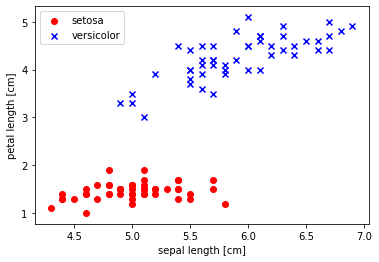

In [7]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='o', label='setosa');
plt.scatter(X[51:, 0], X[51:, 1], color='blue', marker='x', label='versicolor');
plt.xlabel('sepal length [cm]');
plt.ylabel('petal length [cm]');
plt.legend(loc='upper left');

In [8]:
X_std = np.copy(X)

In [9]:
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / (X_std[:, 0].std());
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / (X_std[:, 1].std());

In [10]:
ada = AdalineGD(n_iter=15, eta=0.01);
ada.fit(X_std, y);

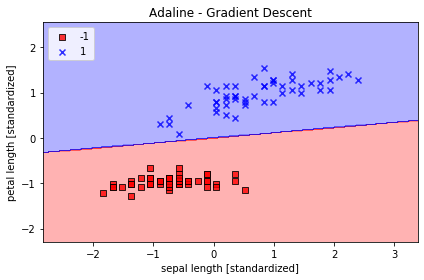

In [11]:
plot_decision_regions(X_std, y, classifier=ada);
plt.title('Adaline - Gradient Descent');
plt.xlabel('sepal length [standardized]');
plt.ylabel('petal length [standardized]');
plt.legend(loc='upper left');
plt.tight_layout();

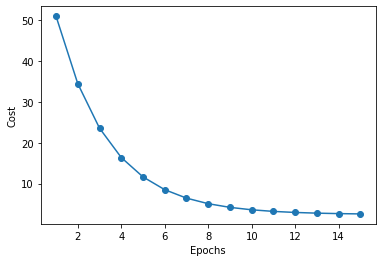

In [12]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o');
plt.xlabel('Epochs');
plt.ylabel('Cost');